# Project: TMDb Movie Data Analysis 
### Prepared by : Muhammad Usman Siddiqui 

## Introduction: 
This report discusses the analysis conducted on a data set about movies obtained from TMDb. The data is imported and cleaned to remove the unecessary parts. Then the data is explored, visualized and statistical analyses are used to answer questions related to the data. The conclusions are communicated at the end of the analysis.  



## Questions The Analysis Aims to Address: 

### Q1. How does the runtime affect the user rating of a movie?

### Q2. Does a higher budget result in a more popular film?

### Q3. Are people watching more movies now? Has the revenue increased overtime?

### Q4. How to maximize the revenue of a film? 

In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

## Data Wrangling

### 1. The data is imported onto Jupyter Notebook

In [83]:
df = pd.read_csv ('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 2. Finding basic information of the data to make sense of it 

In [84]:
#There are 10866 rows and 21 columns

df.shape

(10866, 21)

In [85]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### 3. Dropping unecessary columns to make the data easier to manipulate. 

In [87]:
df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'production_companies', 'release_date'], axis=1, inplace = True)

The budget_adj and revenue_adj columns are used as they account for the inflation over time, resulting in a more resonable comparison.

In [88]:
df.drop(['keywords', 'id', 'vote_count', 'budget', 'revenue'], axis=1, inplace = True)

In [89]:
df.head()

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


Now the data is cleaned up and ready to be explored. Important conclusions are drawn to answer the questions usign the exploration.

## Data Exploration 

### Initial Exploration 
First, simple and direct code is used to make quick analyses.

Histograms are generated for the data to start seeing trends and making conclusions. The histograms are helpful, but none of the questions posed above are answered solely on the histograms so further exploration is necessary.

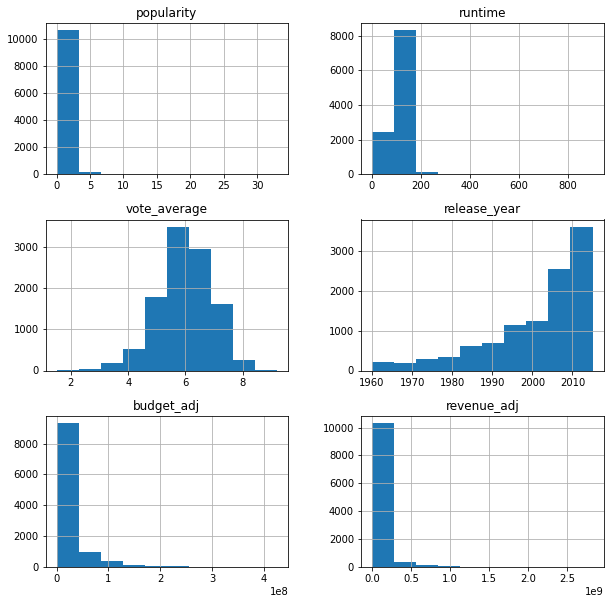

In [90]:
df.hist(figsize= (10,10));

Important stastics of the data are also obtained to be used to answer the questions posed. The mean, maximum, and all other statistics of the paramters used in the discussion below are obtained from the following table:

In [91]:
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Discussion and Conclusion

### Q1. How does the runtime affect the user ratings of a movie?

First, there are rows for which the runtime is listed as zero. Those rows are dropped as they may introduce an error to the analysis.

In [92]:
df.drop(index = df[df['runtime'] == 0].index , inplace = True)
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10835.000000,10835.000000,10835.000000,10835.000000,1.083500e+04,1.083500e+04
mean,0.647757,102.362898,5.976253,2001.296078,1.760010e+07,5.151132e+07
std,1.001158,30.946957,0.935051,12.819389,3.434284e+07,1.448131e+08
min,0.000065,2.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208561,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384763,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715444,112.000000,6.600000,2011.000000,2.094485e+07,3.389248e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


To answer this, a scatterplot is plotted to visualize the effect of runtime on user ratings.

In [93]:
x = df['runtime']

y = df['vote_average']

runtime_avg = np.mean(x)

Text(0, 0.5, 'Average user rating')

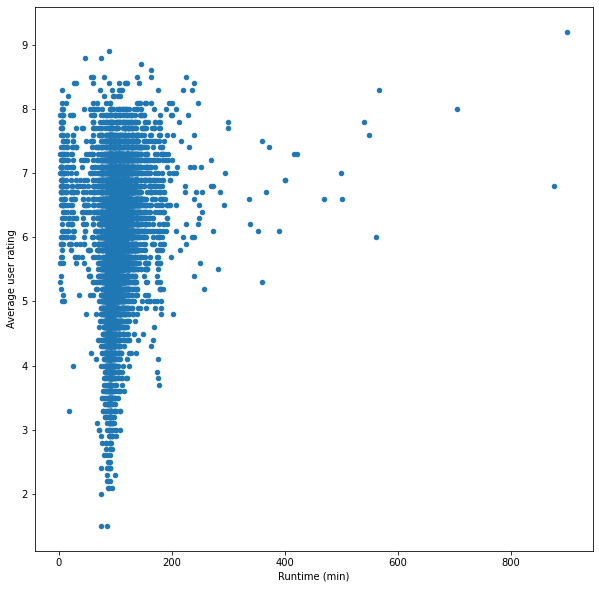

In [94]:
plt.scatter(x,y, s= 20)
plt.xlabel('Runtime (min)')
plt.ylabel('Average user rating')

Most of the films with lower ratings have a runtime of around or less than the mean runtime (102 minutes). As the runtime gets longer, more and more movies have a rating above average (6). The highest rated movie has the longest runtime. It appears that as the runtime gets longer, the scatter of plots becomes more populated in the upper half corresponding to a highr rating. However, there are limitations. 

### Limitations: 

There is a far greater number of movies with a lower runtime, near the mean of 102 mins , than there are movies with a longer runtime, near the maximum of 900 mins. This means there a far greater chance for a movie with a smaller runtime to have a lower rating simply because there is a lot more of them. The number of users voting is not the same for all the movies which means the average rating is effected by anomalies for some movies.

### Tying it all together:
The trend shows that a longer runtime corresponds to a higher rating. But, other factors are also at play which are not considered. There are a lot more movies with a smaller runtime which includes movie with a bad story line and bad production. It is possible that the highest rated movie which also has the longest runtime, is a masterpiece. The few number of movies with longer runtimes could be exceptionally good resulting in a higher rating and runtime could have had nothing to do with their ratings. So more data of movies with a long runtime is needed to reach a hard verdict.

Answering the question: Movies with a longer runtime tend to have a rating above average, and most of the movies with below average rating have a smaller runtime. With a longer runtime, a higher rating is more probable according to the data, but limitations apply.

### Q2. Does a higher budget result in a more popular film?

For some movies, the budget value is not provided and is listed as 0, and for some the popularity value is listed as 0. If the budget is listed a 0, but a value for the popularity is provided or the other way round, then the analysis will have an error associated to it. Thus, rows containing a value of 0 for either column are deleted.

In [95]:
df.drop(index = df[df['budget_adj'] == 0].index , inplace = True)
df.drop(index = df[df['popularity'] == 0].index, inplace = True )
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,5167.000000,5167.000000,5167.000000,5167.000000,5.167000e+03,5.167000e+03
mean,0.992748,107.155409,6.032901,2001.249468,3.690673e+07,1.022350e+08
std,1.329408,22.668905,0.883457,11.777895,4.196174e+07,1.959469e+08
min,0.001117,4.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,0.348090,93.000000,5.500000,1996.000000,8.105479e+06,0.000000e+00
50%,0.624900,103.000000,6.100000,2005.000000,2.274082e+07,2.866447e+07
75%,1.152677,117.000000,6.600000,2010.000000,5.008384e+07,1.134339e+08
max,32.985763,540.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Now, for the further cleaned data, a scatterplot is plotted to visualize the trend between budget and popularity.

In [96]:
xx = df['budget_adj']
yy = df['popularity']

Text(0, 0.5, 'Popularity')

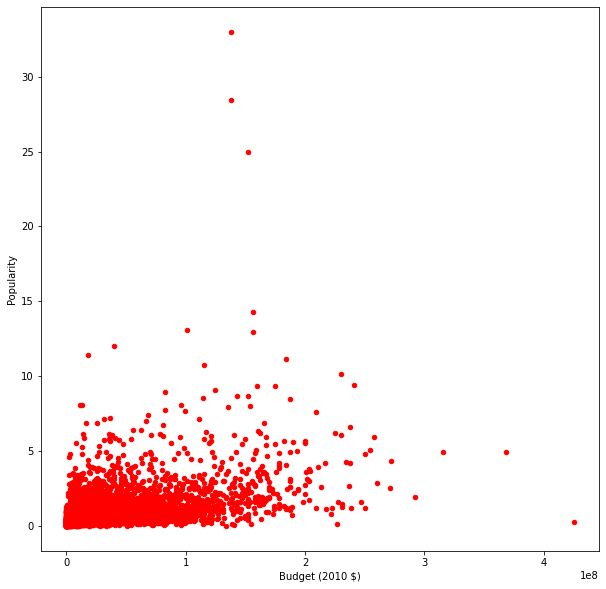

In [97]:
plt.scatter(xx,yy, s= 20 , c = 'red' )
plt.xlabel('Budget (2010 $)')
plt.ylabel('Popularity')

There is no significant trend between the budget of a film and it's popularity. The film with the lowest budget and the film with the highest budget both have a low popularity rating. The films with a budget less than half of the maximimum budget (4.25e+08 dollars), but greater than the mean budget (3.69e+07 dollars) seem to be most popular. The only trend this data shows is that films with an excessively high budget are less popular. Films with a budget around and a little greater than the mean tend to be more popular. Very little correlation can be see here so factors other than budget have a greater impact on the popularity of a film. 

Answering the question: a higher budget does not result in a more popular film, the data shows that it is the other way round.

### Q3. Are people watching more movies now? Has the revenue increased overtime?

The data is cleaned further to remove the rows which have a value of 0 for the revenue. 

In [98]:
df.drop(index = df[df['revenue_adj'] == 0].index , inplace = True)

A bar graph in which each bar goes up to the maximum revenue generated in a year is plotted to visualize how the revenue has changed with the years.

Text(0, 0.5, 'Revenue (2010 $)')

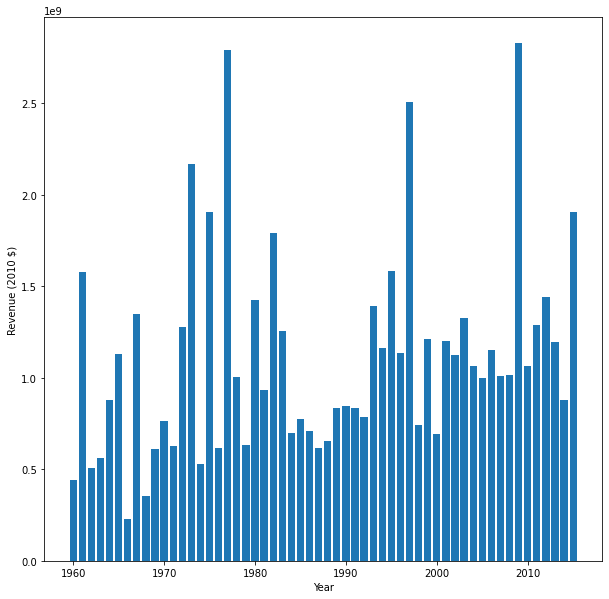

In [99]:
y= df['revenue_adj'] 
x= df['release_year'] 

plt.bar(x,y)
plt.xlabel('Year')
plt.ylabel('Revenue (2010 $)')

From the bar graph, it looks like that the revenue generated has increased over the years. However, the bars represent the maximimum revenue genererated in each year and the maximum might not accurately represent the revenue of a year. Therefore, to reach a more quantitative solution, the mean revenue generated in the last 15 (2000-2015) years and the mean revenue generated in the firt 15 years (1960-1975) are determined and compared.  

In [100]:
#A loop is used to determine the mean revenue of a specified time period
mean_tot = 0

# Mean revenue from 2000-2015
for i in range (2000, 2015):
    yr = df.drop(index = df[df['release_year'] != i].index) 
    inc = np.mean(yr['revenue_adj']) 
    mean_tot += inc 
    mean_rev = mean_tot/15
    yr = df
    
print (mean_rev)

125986687.87768252


In [101]:
# Mean revenue from 1960-1975

mean_tot = 0

for i in range (1960, 1975):
    yr = df.drop(index = df[df['release_year'] != i].index) 
    inc = np.mean(yr['revenue_adj']) 
    mean_tot += inc 
    mean_revf = mean_tot/15
    yr = df
   
print (mean_revf)

283471099.081762


The mean revenue generated in the years 1960-1970 is greater than the mean revenue generated in the years 2000-2015. This implies that more people watched movies in the the past than they do now. However, there are limitations to this verdict. 

### Limitations: 
There are cheaper ways to watch movies now, so the viewers could have increased and the price to watch movies could have decreased, resulting in a lower revenue. In recent times, ways to watch movies without paying such as pirating them have become more common. It is possible that more people are watching movies now without paying and not contributing to its revenue.

### Tying it all together: 
The chart shows that the maximum revenue by a movie each year has increased. This means that in most years there is a movie now which amasses a big revenue. However, the mean revenue has decreased over time. This means that overall movies make a smaller revenue than they did before. A smaller revenue translates to a smaller viewership. But back in the day, the cinema culture was stronger so more people paid to watch a movie. Now, streaming and pirating have made it cheaper to watch a movie. So even though this data set implies viewership has decreased, more data is needed to prove that.

Answering the question: According to the data, a smaller revenue was generated in the recent years corresponding to a smaller audience. However, this conclusion is hard to believe as the population of the world has increased and it is easier to watch films now, so further exploration is necessary. 

### Q4. How to maximize the revenue of a film? 

Finding the row with the maximum value of revenue in the data set. 

In [102]:
df['revenue_adj'].argmax()

344

In [103]:
display(df.iloc[344])

popularity                                        9.432768
original_title                                      Avatar
runtime                                                162
genres            Action|Adventure|Fantasy|Science Fiction
vote_average                                           7.1
release_year                                          2009
budget_adj                                240886902.887613
revenue_adj                               2827123750.41189
Name: 1386, dtype: object

In [104]:
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,1.191400,109.215824,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,1.475002,19.922166,0.79504,11.281989,4.480403e+07,2.160944e+08
min,0.001117,15.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462448,95.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,0.797298,106.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,1.368245,119.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,32.985763,338.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


When the maximum revenue occurs in the dataset, the runtime is longer than average and the budget is greater than average. This is not enough to draw a conclusion. Trends of how the revenue varies with the budget and the runtime are looked at by plotting scatterplots.

Text(0, 0.5, 'Revenue (2010 $)')

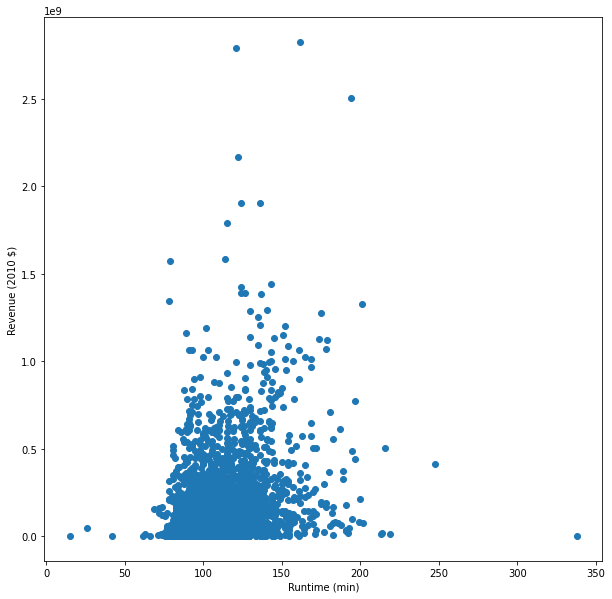

In [105]:
y= df['revenue_adj'] 
x= df['runtime'] 

plt.scatter(x,y)
plt.xlabel('Runtime (min)')
plt.ylabel('Revenue (2010 $)')

The concentration of data points with revenue greater than the mean revenue tend to be within 40% of the average runtime. If the runtime is greater that 40% of the average or lower than 40% of the average, the movie has a low revenue; the movies at the extremes have low revenues. This finding supports the data value with the highest revenue which is obtained above. The movie with the highest revenue has a runtime greater than 45% of the average runtime.

Text(0, 0.5, 'Revenue (2010 $)')

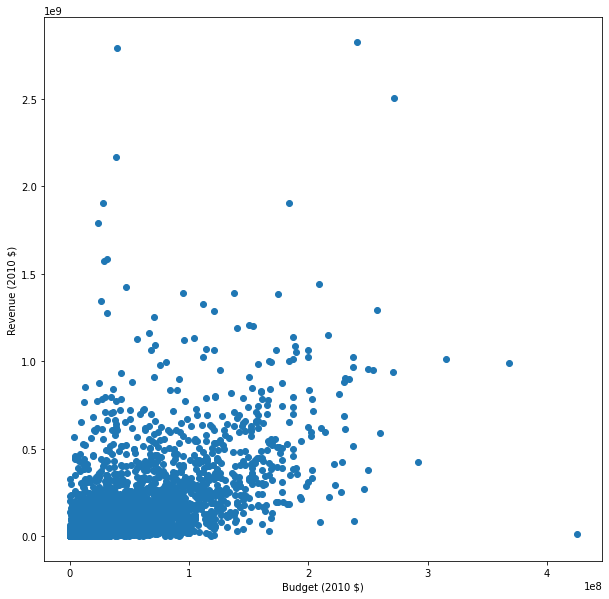

In [106]:
y= df['revenue_adj'] 
x= df['budget_adj'] 

plt.scatter(x,y)
plt.xlabel('Budget (2010 $)')
plt.ylabel('Revenue (2010 $)')

In general, as budget increases, the population of the points moves upwards corresponding to a higher revenue. That being said, there are movies with some of the highest revenues in the data set which have a budget around or less than the mean budget. The movie with the highest revenue in this data set has a budget about 5 times greater than the mean budget. Some movies with a low budget have a high revenue and some movies with a high budget have a high revenue, so there is no clear correlation. Therefore, factors other than budget have a greater effect on revenue. 

### Tying it all together: 
The highest revenue occurs when the runtime is within 40% of the average runtime, and not at the extremes. Furthermore, the highest revenues occur when the budget is close to mean or much larger than the mean. The data is very variable and there is no clear trend, so factors other than budget have a greater impact on the revenue. 
